# Resiliences - Package design

## Definitions

1. Graph *density* is understood as the ratio of the number of links present in the graph to the number of all possible links: $D = \frac{2m}{n(n-1)}$, where:
     - $m$ is the number of links (edges), and
     - $n$ is the number of nodes (vertices).
2. Random edge - an edge randomly chosen from those present in the graph$^1$. 
3. Random graph - a random geometric graph; the mathematically simplest spatial network. An undirected graph constructed by randomly placing $N$ nodes in some metric space, according to the specified probability distribution, and connecting two nodes if and only if their distance is in a given range, eg. smaller than a certain neighborhood radius $r$.

$^1$ As opposed to an edge built from two randomly chosen vertices, without considering if the edge is present in the graph or already absent.

### Supporting functions

In [ ]:
import igraph, random, distutils

In [ ]:
def graph(vertex_count):
    
    g = igraph.Graph()
    
    g.add_vertices(vertex_count)
    
    return g

g = graph(10)

g.name = "simple"

print(g)

print g.name

In [ ]:
def random_vertex_number(g):
    
    vertices = g.vcount()
    
    return random.randrange(vertices)

print(random_vertex_number(g))

In [ ]:
def random_vertex_pair(g):
    
    pair = []
    
    vertex = random_vertex_number(g)
    
    pair.append(vertex)
    
    another_vertex = random_vertex_number(g)
    
    while another_vertex == pair[0]:
        another_vertex = random_vertex_number(g)

    pair.append(another_vertex)

    return pair


for i in range(1):
    
    pair = random_vertex_pair(g)

    print(pair)

In [ ]:
def add_random_edges(g, edge_count):
    
    edges = []
    
    for i in range(0, edge_count):
        
        vertex_pair = random_vertex_pair(g)
        
        if not g.are_connected(vertex_pair[0], vertex_pair[1]):

            edges.append(vertex_pair)

            g.add_edges(edges)
            
            edges.remove(vertex_pair)
    
    return g

g = add_random_edges(g, 5)

print g.name
print(g)

In [ ]:
def density(g):
    
    return g.density(loops = False)

print(density(g))

### Preview the generated graph

In [ ]:
from IPython.display import SVG, display
import os
    
def generate_graph_preview(g):
    
    directory = "graphs/"
    
    file_name = directory + g.name
    
    dot_ext = ".dot"
    svg_ext = ".svg"
    
    g.write(file_name + dot_ext)
    
    cmd = "dot " + file_name + dot_ext + " -Tsvg > " + directory + g.name + svg_ext 
    
    os.system(cmd)

def preview_graph(g):
    
    directory = "graphs/"
    
    file_name = directory + g.name + ".svg"
    
    display(SVG(file_name))
    
    #os.system("rm " + file_name)

def show(g):
    
    generate_graph_preview(g)
    
    preview_graph(g)

show(g)

In [ ]:
def dominant_component(g):
    
    name_safe = g.name
    
    connected_components = g.clusters()
    
    dominant_component = connected_components.giant()
    
    dominant_component.name = name_safe
    
    return dominant_component

def connected(g):
    
    return g.is_connected()

g = dominant_component(g)

print("Is g connected?", connected(g))

show(g)

In [ ]:
def random_edge(g):
    
    edge = random.choice(g.es())
    
    #vertex_tuple = edge.tuple

    return edge

print random_edge(g).tuple

In [ ]:
def breaks_upon_attack(g):
    
    edge = random_edge(g)
    
    safe_name = g.name
    
    g = g - edge
    
    g.name = safe_name
    
    broken = not connected(g)
    
    return [broken, g, edge]

[broken, g, edge] = breaks_upon_attack(g)

print broken

print g

print g.name

print "Affected edge:", edge.tuple

#### Preview the graph after attack

In [ ]:
generate_graph_preview(g)

preview_graph(g)

---

#### Generate test graphs

In [ ]:
# Generate a random geometric (Euclidean) graph with
# n vertices and approximately m edges.
def euclidean_net(n, m):
    
    g = igraph.Graph()
    
    radius = 0.2
    
    #graph_density = 0
    
    while g.ecount() < m:
        
        g = igraph.Graph().GRG(n, radius)
        
        g.name = "Euclidean"

        g = dominant_component(g)

#         graph_density = density(g)
        
        radius = radius + 0.1

    return g

def inspect(g):
    
    print "=== Graph type:", g.name, "==="

    print "Density:", round(density(g), 3)

    print "Vertices:", g.vcount()
    
    print "Edges:", g.ecount()

g = euclidean_net(80, 20)

inspect(g)

In [ ]:
# Generate a random graph with
# n vertices and m edges.

# WARNING/TODO: Freezes "randomly" from time to time
def random_net(n, m):
    
    g = graph(vertex_count = n)
    
    g = add_random_edges(g, edge_count = m)
    
    g.name = "random"
    
    g = dominant_component(g)
    
    while g.vcount() < n or g.ecount() < m:
        
        g.add_vertices(n - g.vcount())

        g = add_random_edges(g, edge_count = m - g.ecount())
        
        g = dominant_component(g)
    
    return g

# import cProfile
# cProfile.run('g = random_net(19, 3)')

g = random_net(7, 7)

inspect(g)

show(g)

In [ ]:
# How many random attacks did it
# take to break the net?
def random_connectivity_degree(g):
    
    degree = 0
    
    while g.ecount() > 0 and connected(g):

        edge = random_edge(g)
    
        safe_name = g.name

        g = g - edge

        g.name = safe_name
        
        degree += 1

#     return [broken, g, edge]

        return degree

print random_connectivity_degree(g)

In [ ]:
# Run a campaign of net creation and attacking
# until discontinuity.

def compare_resiliences(n, m):

    g = random_net(n, m)

    #inspect(g)

    rcd = random_connectivity_degree(g)

    print "Resilience factor:", rcd
    
    show(g)

#     g_prime = euclidean_net(n, m)

#     inspect(g_prime)

#     print "Resilience factor:", random_connectivity_degree(g_prime)


# import cProfile

# report = cProfile.run('compare_resiliences(6, 5)')

compare_resiliences(6, 5)

<class 'igraph.Graph'>
<class 'igraph.clustering.VertexClustering'>
Clustering with 30 elements and 4 clusters
[0] 0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
    22, 23, 24, 25, 26, 27, 29
[1] 2
[2] 4
[3] 28


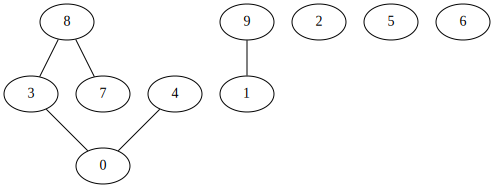

In [25]:
import igraph
import resiliences

reload(resiliences)

def new_compare_resiliences(n, m):
    
    e = resiliences.experiment()

    g = e.random_net(n, m)

    print type(g)
    
    connected_components = g.clusters()
    
    print type(connected_components)
    
    print connected_components

    dominant_component = connected_components.giant()
    
    g = dominant_component

    e.show(g)
    
new_compare_resiliences(30, 30)